In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mtcars = pd.read_csv('../resources/mtcars.csv')
print(mtcars)
print("......................................................................")

#kojih 5 automobila ima najveću potrošnju? ->sort
sorted_mtcars = mtcars.sort_values('mpg', ascending=False)
#print(sorted_mtcars)
print("Najveću potrošnju ima slijedecih 5 automobila: ")
print(sorted_mtcars.iloc[0:5,0:1])
print("......................................................................")

#koja 3 automobila s 8 cilindara imaju najmanju potrošnju?
sorted_mtcars = mtcars.sort_values(['cyl','mpg'], ascending=(False))
#print(sorted_mtcars)
print("Najmanju potrošnju s 8 cilindara imaju slijedeca 3 automobila: ")
#print(sorted_mtcars.iloc[0:3,0:1])
print(mtcars.query('cyl == 8').sort_values(by=['mpg'], ascending=True).head(3))
#print(sorted_mtcars.iloc[sorted_mtcars['cyl' == 8].count():3,0:1])
print("......................................................................")

#kolika je srednja potrošnja automobila sa 6 cilindara?
grouped_mtcars = mtcars.groupby('cyl')
mean_mtcarsByCyl6 = grouped_mtcars['mpg'].mean() 
print(mean_mtcarsByCyl6)
print("Srednja potrošnja automobila sa 6 cilindara je: ",mean_mtcarsByCyl6.iloc[1])
print("......................................................................")

#kolika je srednja potrošnja automobila s 4 cilindra mase između 2000 i 2200 lbs? ---???????????
sorted_mtcars = mtcars.sort_values(['cyl','wt'], ascending=(True))
#print(sorted_mtcars)
#print(sorted_mtcars[['car', 'mpg', 'cyl', 'wt']])
mpg_objects = mtcars[(mtcars.cyl == 4) & (mtcars.wt > 2.0) & (mtcars.wt < 2.2)].mpg
print("Srednja potrošnja automobila s 4 cilindra mase između 2.0 i 2.2 iznosi: ", mpg_objects.mean())
print("......................................................................")

#Koliko je automobila s ručnim, a koliko s automatskim mjenjačem u ovom skupu podataka?
groupByAutomatic = mtcars.groupby('am')
automatic = groupByAutomatic.count().car[0] #0 je automatic
manual = groupByAutomatic.count().car[1]
#print( groupByAutomatic.count().car)
print("Automobili s automatskim mjenjačem: ", automatic)
print("Automobili s rucnim mjenjacem: ", manual)
print("......................................................................")

#Koliko je automobila s automatskim mjenjačem i snagom preko 100 konjskih snaga?
groupByAutomaticAndPower = mtcars.groupby(['am', 'hp'])
print(groupByAutomaticAndPower.count())
print(mtcars.groupby('am')['hp'].apply(lambda x: x[x > 100].count()))
automaticAndPower = mtcars.groupby('am')['hp'].apply(lambda x: x[x > 100].count())[0]
print("Automobili s automatskim mjenjacem i snagom preko 100hp:", automaticAndPower)
print("......................................................................")

#Kolika je masa svakog automobila u kilogramima?
mtcars['wt_kilos'] = mtcars['wt'] *0.45359237*1000 
print(mtcars.iloc[:,[0,-1]])

                    car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

......................................................................


Text(0, 0.5, 'hp')

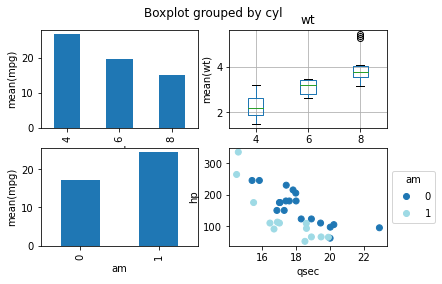

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mtcars = pd.read_csv('../resources/mtcars.csv')
#print(mtcars)
print("......................................................................")

fig, axes = plt.subplots(nrows=2, ncols=2)

#grouped_mtcars = mtcars.groupby('cyl')
#mean_mtcarsByCyl = grouped_mtcars['mpg'].mean() 
#print(mean_mtcarsByCyl.iloc[0:3])
#Pomoću barplot-a prikažite na istoj slici potrošnju automobila s 4, 6 i 8 cilindara.
df1 = pd.DataFrame(mtcars)
ax1 = df1.groupby(by = 'cyl')['mpg'].mean().plot(kind = 'bar',ax=axes[0,0])
ax1.set_ylabel('mean(mpg)')

#Pomoću boxplot-a prikažite na istoj slici distribuciju težine automobila s 4, 6 i 8 cilindara.
#grouped_mtcars = mtcars.groupby('cyl')
#mean_mtcarsByCyl = grouped_mtcars['wt'].mean() 
#print(mean_mtcarsByCyl.iloc[0:3])
df2 = df1
ax2 = mtcars.boxplot(column = ['wt'], by = 'cyl',ax=axes[0,1])
#df1.groupby(by = 'cyl')['wt', 'mpg'].mean().plot(kind = 'bar') #skupa
ax2.set_ylabel('mean(wt)')

#Pomoću odgovarajućeg grafa pokušajte odgovoriti na pitanje imaju li automobili 
#s ručnim mjenjačem veću potrošnju od automobila s automatskim mjenjačem?
#groupByAutomatic = mtcars.groupby('am')
#automatic = groupByAutomatic.count().car[1]
#manual = groupByAutomatic.count().car[0]
#print(groupByAutomatic['mpg'].mean())
df3 = df1
ax3 =  df3.groupby(by = 'am')['mpg'].mean().plot(kind = 'bar',ax=axes[1,0])
ax3.set_ylabel('mean(mpg)')

#Prikažite na istoj slici odnos ubrzanja i snage automobila za automobile s 
#ručnim odnosno automatskim mjenjačem.
#groupByAutomatic = mtcars.groupby('am')
#automatic = groupByAutomatic.count().car[1]
#manual = groupByAutomatic.count().car[0]
#print(groupByAutomatic[['qsec', 'hp']].mean())
df4 = df1
#ax4 =  df4.groupby(by = 'am')[['qsec', 'hp']].mean().plot(kind = 'scatter', x = "qsec", y = "hp", c=['b','r'],ax=axes[1,1])
#ax4.set_ylabel('hp')
#ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), data = [0,1], title="am")

ax4 = plt.scatter( df1["qsec"], df1["hp"], c=df1["am"], cmap="tab20")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),*ax4.legend_elements(), title="am")
plt.xlabel('qsec')
plt.ylabel('hp')


In [13]:
import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET

# url that contains valid xml file:
url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
while True:
    
    try:
        obj = root.getchildren()[i].getchildren()
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1
 
#1
df.vrijeme = pd.to_datetime(df.vrijeme)
df.plot(y='mjerenje', x='vrijeme')

# add date month and day designator
df['vrijeme'] = pd.to_datetime(df['vrijeme'], utc = True)
df['vrijeme'] = df['vrijeme'].dt.date
df['month'] = pd.DatetimeIndex(df['vrijeme']).month
df['dayOfweek'] = pd.DatetimeIndex(df['vrijeme']).dayofweek

#2
#print(df.vrijeme, df.mjerenje)
print(df.sort_values(by = ['mjerenje'], ascending = False).head(3).vrijeme)

#3 oni dani gdje nema vrijednosti te broji
print(df)
print(pd.date_range(start = '2017-01-01', end = '2017-12-31' ).difference(df.vrijeme))

df_missing_values = pd.DataFrame(columns=('mjerenje', 'vrijeme'))
df_missing_values['vrijeme'] = pd.date_range(start = '2017-01-01', end = '2017-12-31' ).difference(df.vrijeme)
df_missing_values['vrijeme'] = pd.to_datetime(df_missing_values['vrijeme'], utc = True)
df_missing_values['vrijeme'] = df_missing_values['vrijeme'].dt.date
df_missing_values['month'] = pd.DatetimeIndex(df_missing_values['vrijeme']).month
print(df_missing_values.sort_values(by = ['month'], ascending = False))
#ax = df.plot.bar(df_missing_values['month'].count())
#ax = df.plot.bar(df_missing_values.groupby(by = 'month').count(), df_missing_values['month'])

TypeError: no numeric data to plot